# Assignment 2 / Clustering and Basic Classification

#### TFIDF in ScikitLearn
Luckily we need only recall the details of the notions of these techniques and not implement them.  In Scikitlearn, most of the machinery of TFIDF is done for us using `CountVectorizer`, [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer).

In [3]:
%matplotlib inline

### A TFIDF Example

Let us consider loading the first 50 plots of the plots file.  The code below will read the first 50 lines of the plot summary file and store them in a `dict` for further processing.

In [4]:
import csv

plots_50 = {}
with open("./data/top1000_movie_summaries.tsv") as fi:
    tsvReader = csv.reader(fi, delimiter='\t')
    for i, (title, plot) in enumerate(tsvReader):
        plots_50[title]=plot
        if i == 49:
            break


In [5]:
plots_50.keys()[:10]

["It's a Wonderful Life",
 'Seven Samurai',
 'The Godfather: Part II',
 'The Green Mile',
 'Modern Times',
 'Se7en',
 'The Matrix',
 'Sunset Boulevard',
 'Once Upon a Time in the West',
 'Memento']

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
# create the tfidf matrix
tfidf_matrix = vectorizer.fit_transform(plots_50.values())

# convert the matrix to an array - which reduces the sparseness of the matrix
tfidf_array = tfidf_matrix.toarray()

In [7]:
vectorizer.get_feature_names()[:100]

[u'000',
 u'1000',
 u'1100',
 u'12',
 u'15',
 u'17',
 u'1910s',
 u'1930s',
 u'1936',
 u'1944',
 u'1950s',
 u'2nd',
 u'30',
 u'40',
 u'abandoned',
 u'ability',
 u'abject',
 u'able',
 u'about',
 u'absolute',
 u'absolution',
 u'accepts',
 u'access',
 u'accidentally',
 u'accomplish',
 u'accused',
 u'action',
 u'actions',
 u'acts',
 u'addition',
 u'advance',
 u'advanced',
 u'adventure',
 u'adventurous',
 u'affected',
 u'african',
 u'after',
 u'again',
 u'against',
 u'agency',
 u'agent',
 u'aging',
 u'aid',
 u'alfred',
 u'alimony',
 u'alive',
 u'all',
 u'alleviate',
 u'alliance',
 u'allied',
 u'allowing',
 u'allows',
 u'ally',
 u'almost',
 u'alone',
 u'along',
 u'also',
 u'always',
 u'america',
 u'american',
 u'amid',
 u'amidst',
 u'amount',
 u'amusement',
 u'an',
 u'ancient',
 u'and',
 u'angel',
 u'angier',
 u'another',
 u'answers',
 u'apartment',
 u'approach',
 u'aragorn',
 u'archeology',
 u'are',
 u'area',
 u'aristocratic',
 u'ark',
 u'army',
 u'around',
 u'arrives',
 u'art',
 u'artifact'

In [8]:
vectorizer.idf_

array([ 3.83321334,  4.23867845,  4.23867845, ...,  4.23867845,
        2.53393036,  4.23867845])

In [9]:
plots_50[plots_50.keys()[0]]  # it's a wonderful life is the first movie

"George Bailey has spent his entire life giving of himself to the people of Bedford Falls. He has always longed to travel but never had the opportunity in order to prevent rich skinflint Mr. Potter from taking over the entire town. All that prevents him from doing so is George's modest building and loan company, which was founded by his generous father. But on Christmas Eve, George's Uncle Billy loses the business's $8,000 while intending to deposit it in the bank. Potter finds the misplaced money and hides it from Billy. When the bank examiner discovers the shortage later that night, George realizes that he will be held responsible and sent to jail and the company will collapse, finally allowing Potter to take over the town. Thinking of his wife, their young children, and others he loves will be better off with him dead, he contemplates suicide. But the prayers of his loved ones result in a gentle angel named Clarence coming to earth to help George, with the promise of earning his win

The follow code will just return the scores from the first movie **only** for the terms with a score **greater than 0**.

In [10]:
[(score, term)  for score, term in zip(tfidf_array[1], vectorizer.get_feature_names()) if score > 0]

[(0.13547779388675402, u'40'),
 (0.091484972436923981, u'and'),
 (0.14980820375807655, u'answers'),
 (0.14980820375807655, u'attack'),
 (0.27095558777350803, u'bandits'),
 (0.11742361261454499, u'battle'),
 (0.14980820375807655, u'culminates'),
 (0.13547779388675402, u'day'),
 (0.14980820375807655, u'defend'),
 (0.14980820375807655, u'fallen'),
 (0.11742361261454499, u'film'),
 (0.072151389045991207, u'for'),
 (0.072151389045991207, u'from'),
 (0.14980820375807655, u'gathers'),
 (0.14980820375807655, u'giant'),
 (0.13547779388675402, u'hard'),
 (0.078595205258502346, u'has'),
 (0.072151389045991207, u'he'),
 (0.10553162742351274, u'help'),
 (0.089557054150858781, u'him'),
 (0.13547779388675402, u'how'),
 (0.04967354935423858, u'in'),
 (0.14980820375807655, u'meals'),
 (0.068427617645104688, u'on'),
 (0.1008122087886362, u'other'),
 (0.14980820375807655, u'protection'),
 (0.12531020627335634, u'request'),
 (0.44942461127422961, u'samurai'),
 (0.11742361261454499, u'small'),
 (0.14980820

### &#167; WARMUP Take the first 10 plot summaries and find the summaries they are most similar to Euclidean and Cosine Similarity

* Euclidean distance metrics can be done using [sklearn.metrics.pairwise.euclidean_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html#sklearn.metrics.pairwise.euclidean_distances) and
* cosine similarity will be done using [sklearn.metrics.pairwise.cosine_similarity](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html#sklearn.metrics.pairwise.cosine_similarity).




In [13]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

plots_10 = {}

with open("./data/top1000_movie_summaries.tsv") as fi:
    tsvReader = csv.reader(fi, delimiter='\t')
    for i, (title, plot) in enumerate(tsvReader):
        plots_10[title]=plot
        if i == 10:
            break

In [ ]:
vectorizer = TfidfVectorizer(min_df=1)
# create the tfidf matrix
tfidf_matrix = vectorizer.fit_transform(plots_10.values())

# convert the matrix to an array - which reduces the sparseness of the matrix
tfidf_array = tfidf_matrix.toarray()


euclidean = {}
cosine = {}

for i, p1 in enumerate(tfidf_array):
    idx1 = np.argmax(np.array([euclidean_distances(p1, p2) for p2 in tfidf_array]))
    euclidean[plots_10.keys()[i]] = plots_10.keys()[idx1]
    idx2 = np.argmin(np.array([cosine_similarity(p1, p2) for p2 in tfidf_array]))
    cosine[plots_10.keys()[i]] = plots_10.keys()[idx2]
    

In [16]:
euclidean

{'12 Angry Men': 'The Good, the Bad and the Ugly',
 'Fight Club': 'Pulp Fiction',
 'Pulp Fiction': 'Fight Club',
 "Schindler's List": 'The Good, the Bad and the Ugly',
 'The Dark Knight': 'The Good, the Bad and the Ugly',
 'The Godfather': 'The Good, the Bad and the Ugly',
 'The Godfather: Part II': 'Fight Club',
 'The Good, the Bad and the Ugly': '12 Angry Men',
 'The Lord of the Rings: The Fellowship of the Ring': 'Fight Club',
 'The Lord of the Rings: The Return of the King': 'Fight Club',
 'The Shawshank Redemption': 'The Good, the Bad and the Ugly'}

In [15]:
cosine

{'12 Angry Men': 'The Good, the Bad and the Ugly',
 'Fight Club': 'Pulp Fiction',
 'Pulp Fiction': 'Fight Club',
 "Schindler's List": 'The Good, the Bad and the Ugly',
 'The Dark Knight': 'The Good, the Bad and the Ugly',
 'The Godfather': 'The Good, the Bad and the Ugly',
 'The Godfather: Part II': 'Fight Club',
 'The Good, the Bad and the Ugly': '12 Angry Men',
 'The Lord of the Rings: The Fellowship of the Ring': 'Fight Club',
 'The Lord of the Rings: The Return of the King': 'Fight Club',
 'The Shawshank Redemption': 'The Good, the Bad and the Ugly'}

### &#167; WARMUP Discuss the differences or similarity between the results executing the code below.

In [18]:
def test_similarity(type):
    if type == 'euc':
        max_n = 5
        sim = euclidean_distances
    elif type == 'cos':
        max_n = -5
        sim = cosine_similarity
        
    for i in xrange(0, 10):
        test_data = sim(tfidf_matrix)[i]
        #max_n, test_data =  5, euclidean_distances(tfidf_matrix)[i]

        if max_n < 0:
            top_most_similar = zip(test_data.argsort()[max_n:],test_data[test_data.argsort()[max_n:]])
            idx, value = top_most_similar[-2]
        else:
            top_most_similar = zip(test_data.argsort()[:max_n],test_data[test_data.argsort()[:max_n]])
            idx, value = top_most_similar[1]

        # print top_most_similar
        print "{} ({}, {}) and {}({}) are most similar.".format(plots_50.keys()[idx], idx, value, plots_50.keys()[i], i)
        
test_similarity('cos')   
print "\n"
test_similarity('euc')

Sunset Boulevard (7, 0.190230538724) and It's a Wonderful Life(0) are most similar.
The Godfather: Part II (2, 0.284251628294) and Seven Samurai(1) are most similar.
Sunset Boulevard (7, 0.316953923989) and The Godfather: Part II(2) are most similar.
Memento (9, 0.330622021283) and The Green Mile(3) are most similar.
Sunset Boulevard (7, 0.244264386164) and Modern Times(4) are most similar.
Sunset Boulevard (7, 0.273012861179) and Se7en(5) are most similar.
Sunset Boulevard (7, 0.252205541942) and The Matrix(6) are most similar.
The Godfather: Part II (2, 0.316953923989) and Sunset Boulevard(7) are most similar.
The Matrix (6, 0.0758134877008) and Once Upon a Time in the West(8) are most similar.
The Green Mile (3, 0.330622021283) and Memento(9) are most similar.


Sunset Boulevard (7, 1.27261106492) and It's a Wonderful Life(0) are most similar.
The Godfather: Part II (2, 1.1964517305) and Seven Samurai(1) are most similar.
Sunset Boulevard (7, 1.16879944902) and The Godfather: Part I

## Part 1 / Document Clustering

### &#167; Load the 1000 OMDB summaries in to a Python list called `sample_docs`


In [25]:
import csv

sample_docs = []
movie_titles = np.chararray((1000,1))
with open("./data/top1000_movie_summaries.tsv") as fi:
    tsvReader = csv.reader(fi, delimiter='\t')
    for i, (title, summary) in enumerate(tsvReader):
        movie_titles[i] = title
        sample_docs.append(summary)

### &#167; Use `TfidfVectorizer` to load the documents into an array

You will need to explore how to do this with the [example here]().

Once you have your vectorizer and array, you can use the `get_feature_names()` method on `TfidfVectorizer` to get the document terms and their Tfidf scores.  

In [27]:
vectorizer_docs = TfidfVectorizer(min_df=1)
tfidf_matrix_docs = vectorizer_docs.fit_transform(sample_docs)
tfidf_array_docs = tfidf_matrix_docs.toarray()

### &#167; Use `get_feature_names()` to display the top 10 terms and their Tfidf scores  of just the first document

**HINT**
The method and its usage can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names).

In [29]:
names = vectorizer_docs.get_feature_names()
top_10_idx = np.argsort(tfidf_array_docs[0])[::-1][:10]
top_10_terms = [names[i] for i in top_10_idx]

In [30]:
top_10_terms

[u'way',
 u'torturous',
 u'jailhouse',
 u'notably',
 u'formerly',
 u'shawshank',
 u'portrays',
 u'gloomy',
 u'wise',
 u'guilty']

### &#167;  Use the KMeans algorithm with $k=20$ to compute 20 clusters over the 1000 summaries

In [32]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(n_clusters = 20)
km.fit(tfidf_array_docs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### &#167; Explore the clusters by printing the sizes (number of items in each cluster) for all of them.  Your answer should be a list with the cluster number and the number of items in that cluster.

**HINT:**  You will need to use the attribute `labels_` to get the cluster names (there numeric).  This attribute stores each of the documents (in the order they are store in the matrix) and the cluster "label" (number) they belong to.

In [33]:
from collections import Counter

In [34]:
# number of items in each cluster
Counter(km.labels_)

Counter({0: 16,
         1: 20,
         2: 94,
         3: 31,
         4: 10,
         5: 19,
         6: 43,
         7: 24,
         8: 19,
         9: 27,
         10: 189,
         11: 14,
         12: 12,
         13: 116,
         14: 25,
         15: 25,
         16: 93,
         17: 110,
         18: 23,
         19: 90})

### &#167;  Use Hierarchical clustering algorithm with cosine similarity

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
agg_cl = AgglomerativeClustering(n_clusters = 20, affinity = 'cosine', linkage = 'average')
agg_cl.fit(tfidf_array_docs)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average',
            memory=Memory(cachedir=None), n_clusters=20,
            pooling_func=<function mean at 0x109053398>)

In [37]:
Counter(agg_cl.labels_)

Counter({0: 925,
         1: 10,
         2: 6,
         3: 7,
         4: 5,
         5: 4,
         6: 5,
         7: 5,
         8: 2,
         9: 3,
         10: 2,
         11: 1,
         12: 3,
         13: 5,
         14: 3,
         15: 1,
         16: 5,
         17: 2,
         18: 4,
         19: 2})

### &#167; Compare your $k$-means results with those of the hierarchical clustering - point to at least TWO major differences (e.g. cluster distributions, sizes, etc.)

**HINT** 

Use Python's [`Counter`](https://docs.python.org/dev/library/collections.html) class from `collections` on the `.labels_` attribute of your completed clustering results.

From the above we can see that distribution of the cluster sizes is right skewed. More than 90% of the documents are clustered the first cluster.

### &#167; There was a discussion some time ago about adding dendrogram plotting to Scikit-learn (which is still currently not implemented).  Please read that discussion and use the `plot_dendrogram` method below (taken from that discussion) to plot the dendrogram for your hierarchical clusters.

**HINT**
CAREFULLY READ THE DISCUSSION LINK and ORIGINAL CODE: [https://github.com/scikit-learn/scikit-learn/pull/3464](https://github.com/scikit-learn/scikit-learn/pull/3464)


In [38]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

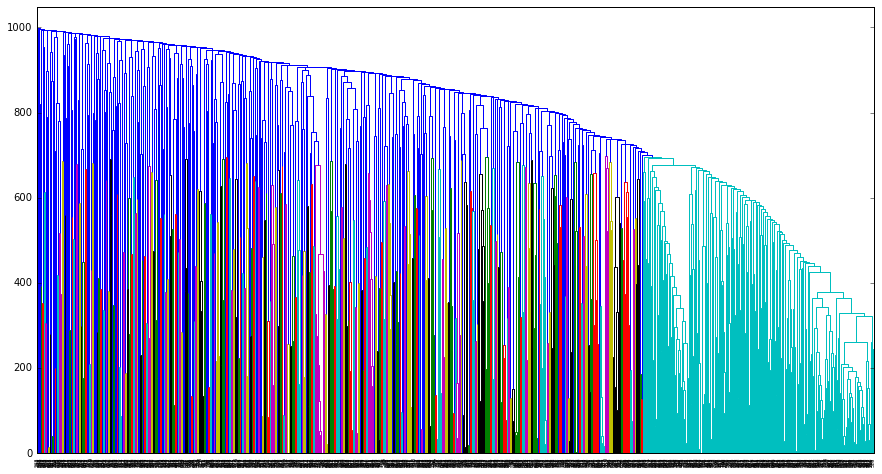

In [40]:
plt.figure(figsize=(15,8))
plot_dendrogram(agg_cl)

### &#167; Associate the clusters with their top terms and print a list of the cluster number and the genres of that cluster.

In [50]:
# Reference : Stack overflow
# Top terms are concenterated at the cluster centers
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(20):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :15]:
        print(' %s' % names[ind])

Top terms per cluster:
Cluster 0:
 thief
 strangers
 young
 who
 follows
 wing
 of
 his
 the
 star
 meets
 silent
 in
 theory
 to
Cluster 1:
 the
 of
 and
 to
 his
 farm
 mrs
 with
 in
 her
 from
 help
 an
 on
 rats
Cluster 2:
 his
 to
 the
 in
 and
 of
 for
 is
 their
 life
 an
 man
 he
 with
 by
Cluster 3:
 the
 future
 to
 and
 of
 in
 dr
 an
 marty
 past
 from
 his
 into
 when
 is
Cluster 4:
 spy
 defend
 to
 an
 american
 cover
 lego
 plane
 the
 captured
 powers
 recruited
 court
 in
 is
Cluster 5:
 his
 the
 to
 and
 john
 connor
 mike
 father
 of
 for
 an
 rambo
 has
 with
 he
Cluster 6:
 and
 to
 the
 he
 his
 charlie
 in
 of
 for
 job
 it
 out
 has
 have
 but
Cluster 7:
 the
 harry
 in
 to
 an
 of
 and
 voldemort
 hogwarts
 lord
 at
 by
 as
 with
 out
Cluster 8:
 their
 two
 of
 friends
 family
 texas
 attacked
 are
 and
 tragedy
 dare
 by
 psychopaths
 three
 along
Cluster 9:
 war
 the
 world
 during
 ii
 to
 of
 in
 from
 japanese
 his
 brutal
 small
 united
 and
Cluster 10

## Part 2 / Classification With $k$-Nearest Neighbors 

### &#167; Using NearestNeighbors in SKL (Scikit-learn) find the 10 nearest neighbors using the movie data you have already begun exploring, storing the data in a variable called neigh

For example, you code will look like:

``` python
...
neigh = #<your nearest neighbor class>
...
```

**HINT:** See the examples on how to do this [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors).

In [51]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10)
neigh = nn.fit(tfidf_array_docs)

### &#167; The function below takes a movie index (from the original data file, in order) and returns the titles of the $k$-nearest neighbors.  It requires you to have set the `neigh` variable to the NearestNeighbor class and have fitted the data to it.

In [52]:
def get_nn_movie_names(movie_index):
    tfidf_array_docs[movie_index]
    print("{}\n===".format(titles[movie_index]))
    for idx, dist in zip(np.nditer(neigh.kneighbors(tfidf_array_docs[movie_index])[1]), 
                         np.nditer(neigh.kneighbors(tfidf_array_docs[movie_index])[0])):
        if idx != movie_index: 
            print(u'{}'.format(titles[idx]))

### &#167; Use `get_nn_movie_names(index)` for the indices and associated movies below.  In one or two sentences give your opinion of how well this method compares to the lists in the links (this is not meant to be scientific). 
| index | movie name | similar movies link |
|-------|------------|---------------------|
| 34 | Saving Private Ryan | [http://www.similarkind.com/search?q=saving+private+ryan](http://www.similarkind.com/search?q=saving+private+ryan) |
| 26 | Life is Beautiful | [http://www.similarkind.com/search?q=the+green+mile](http://www.similarkind.com/search?q=the+green+mile) |
| 199 | Hotel Rwanda | [http://www.similarkind.com/search?q=hotel+rwanda](http://www.similarkind.com/search?q=hotel+rwanda) |

In [55]:
get_nn_movie_names(34)

Saving Private Ryan
===
Walk the Line
Life as a House
Moon
Marathon Man
The Longest Day
Slumdog Millionaire
E.T. the Extra-Terrestrial
Paris, Texas
Legends of the Fall


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [54]:
get_nn_movie_names(24)

Life Is Beautiful
===
The Boy in the Striped Pajamas
Apocalypto
Ordinary People
Wild Tales
Before Sunset
Inglourious Basterds
The Book Thief
High Plains Drifter
All Quiet on the Western Front


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [53]:
get_nn_movie_names(199)

Hotel Rwanda
===


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Grave of the Fireflies
Key Largo
United 93
The Damned United
In America
The Last of the Mohicans
Brokeback Mountain
Whale Rider
The Wrestler


//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


When we compared the similar movies from the link to the results obtained by the get_nn_movie_names(movie_index) method, we notice that the results do not match. The possible reason for this could be because we have checked for similarities between only top 1000 movies. 

### &#167; In 1 or 2 sentences suggest ways to improve the results of the algorithm (e.g. more data, better features, etc.)?

As I have already mentioned above, for us to improve the results of the algorithm we need to consider more features i.e., we need check similarities among more movies not just the top 1000 movies.

## Part 3 / Classification With Decision Trees

### DATA FOR PART 3

We will be using data from the US Federal [Consumer Financial Protection Bureau (CFPB)](http://www.consumerfinance.gov/data-research/consumer-complaints/) which maintains a consumer complaint database.  In it there are a number of factors being stored, including company names, consumer narratives, complaint type, date, etc.

The dataset can be downloaded in its entirety [here](http://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data) as a CSV or JSON file and you will also find it in the [`data`](./data/) directory for this repo.  That file was retrieved on October 30, 2016 and represents data from March 2015 to August 2016 in about 27K rows.

### &#167; Read the complaint data into a Pandas Dataframe called `df` and restrict the data to 4 columns : `Product`, `Sub-product`, `Issue` and `Sub-issue`.

In [56]:
df = pd.read_csv('data/Debt_Collection_Complaints_with_Consumer_Complaint_Narratives.csv')

In [57]:
df_restricted = df[['Product','Sub-product','Issue','Sub-issue']]

### &#167; Create a training dataset with 3000 random data points from `df` and call that `df_train`.

In [60]:
train_indices = np.random.choice(range(0, 27228), size = 3000, replace = False)

In [62]:
df_train = df_restricted.ix[train_indices]

### &#167; Notice that the data are all categorical.  Most algorithms required a little work to get the data into a form that can be easily used.  Binarize `df_train` so that is it ready to be used in most typical scenarios.

#### HINTS

**label_binarize**
One way to do this is to explore  [label_binarize](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html).  You will need to write a lot more code (fewer than 10 lines) but you can do it.

**DictVectorizer**
Another way is to use [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) which is part of the feature extraction library of Scikit-learn.  

You should see how this trick is done from [http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/](http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/) as inspiration for your solution.


In [63]:
from sklearn.feature_extraction import DictVectorizer

def one_hot_dataframe(data, cols, replace=False):
    vec = DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names()
    vecData.index = data.index
    if replace is True:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData, vec)

In [64]:
data, binarized_train_data, DV = one_hot_dataframe(df_train, df_train.columns) 

### &#167; Build a DecisionTree from the training data in df_train.


#### HINTS

**DecisionTreeClassifier**

You will most certainly need to use [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Read up on this classfier and use it with `df_train`.

**Labeled data**

Your classifier is going to be more interesting if it can distinguish between the different classes of company response.

To get all the labels (for all your df rows WITH THE SAME INDEX AS YOUR TRAINING DATA):

```python
df[['Company response to consumer']].ix[[]]
```

should do the trick.  But this will get them for all rows.

Explore [Pandas.unique](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) to understand just how to get the set of labels you need.

In [69]:
responses = df['Company response to consumer'].ix[train_indices]
response_values = responses.unique()

In [70]:
from sklearn.preprocessing import label_binarize
binarized_labels = label_binarize(responses, classes = response_values)

In [71]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(binarized_train_data, binarized_labels)

### &#167; Draw the decision tree.

#### HINTS

**You can use the code from the demo in scikit-learn or build your own**

Use these to help you understand the code snippet below:
* `dtc` is your decision tree from the above
* `DV.feature_names_` is the DictVectorizer from above
* `target_names` are the class names

In [72]:
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(dtc, out_file="tree.dot", 
                         feature_names=DV.feature_names_,  
                         class_names=response_values,  
                         filled=True, rounded=True,  
                         special_characters=True) 

graph = pydotplus.graph_from_dot_file("tree.dot")  
graph.write_png("tree.png")

True

### &#167; Look at the decision tree (stored in your PNG file). List 2 reasons why this WOULD or WOULD NOT be a good classifier for the company response. Turn in your PNG file along with your IPYNB file.

Decision trees are easy and fast to predict the data, which makes it a good classifier. 

In [73]:
Image('tree.png')

### &#167; Compute the Precision and Recall for this classifier - remember you will need to test on data you have not already seen!

#### HINTS
Instead of only pulling 3000 data points you might pull 6000 ad split -- using 3000 for test and 3000 for training.  There are, of course, other ways to do it as discussed in class.

* You could consider Scikit-learn's [`model_selection.train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split);

* You will need to understand how [`DecisionTreeClassifier.predict()`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) works;

* You might want to explore the [metrics capabilities of Scikit-learn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) -- especially the `confusion_matrix()`, `precision_score()` and `recall_score()` methods.

In [74]:
from sklearn.model_selection import train_test_split

In [82]:
_, binarized_df, _ = one_hot_dataframe(df_restricted, df_restricted.columns)
X = binarized_df
y = label_binarize(df['Company response to consumer'], classes = response_values)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) 

In [85]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [86]:
y_pred = clf.predict(X_test)

In [89]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average = None)

array([ 0.76692728,  0.        ,  0.        ,  0.        ,  0.        ])

In [92]:
precision_score(y_test, y_pred, average = 'weighted')

0.5881803792088327

In [90]:
recall_score(y_test, y_pred, average = None)

array([ 0.99588162,  0.        ,  0.        ,  0.        ,  0.        ])

In [93]:
recall_score(y_test, y_pred, average = 'weighted')

0.76377258704275008

In [ ]:
!jupyter nbconvert Homework2.ipynb --to markdown
!pandoc Homework2.md --template svm-latex-ms.tex -o Homework2.pdf